<a target="_blank" href="https://colab.research.google.com/github/butler-julie/DataScienceForPhysicists2025/blob/main/08_DatabasesAndAPIs/DatabasesAndAPIs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Accessing training data for machine-learning: materials data APIs

Author: Cormac Toher (University of Texas at Dallas)

Date Created: March 6, 2025

Last Modified: May 21, 2025

Created for the *Short Course on Data Science for Physicists* at the 2025 Global Physics Summit. Modified for GDS Seminar Series.

* Machine-learning benefits from large quantities of data for training and testing

* Materials data is now available online through websites and programmatically accessible APIs

* Available data includes both experimental (relatively scarce and often requiring license fees) and computational data (relatively plentiful and freely available)

* Computational materials databases include:
>* AFLOW: https://aflow.org; [AFLOW reference](https://www.sciencedirect.com/science/article/abs/pii/S0927025622005195)
>* Materials Project: https://materialsproject.org; [Materials Project reference](https://pubs.aip.org/aip/apm/article/1/1/011002/119685/Commentary-The-Materials-Project-A-materials)
>* NOMAD: https://nomad-lab.eu; [NOMAD reference](https://joss.theoj.org/papers/10.21105/joss.05388)
>* OQMD: https://oqmd.org; [OQMD reference](https://link.springer.com/article/10.1007/s11837-013-0755-4)
>* Materials Cloud: https://materialscloud.org; [Materials Cloud reference](https://www.nature.com/articles/s41597-020-00637-5)

* Databases can be accessed programmatically using REST-APIs

REST-API: Representational State Transfer Application Programming Interface


* In response to a client request, the API transfers a representation of the current state (e.g. current version of a section of a database) to the client

* Commonly used methods: GET (retrieve data from server), POST (post data to server)

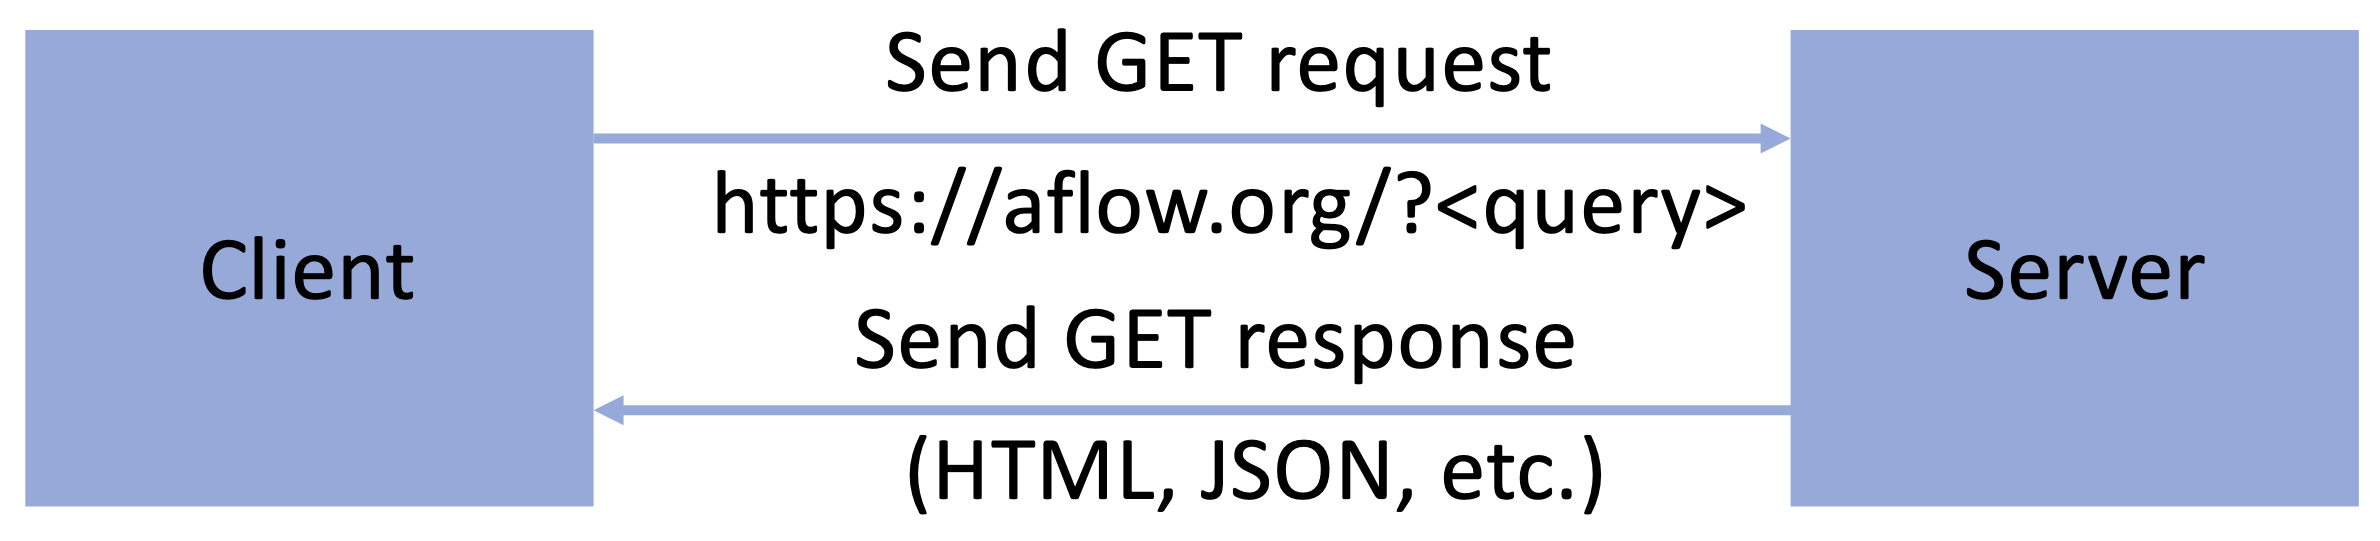

GET request is submitted in the form of a URI (Uniform Resource Identifier)

* URI has the following format:

\<scheme\>://\<authority>/\<path>?\<query>#\<fragment>

# AFLUX Search API for AFLOW database

AFLUX Search API can be used to programmatically retrieve data from the AFLOW database.

* AFLUX URI has the format: https://aflow.org/API/aflux/?<matchbook\>,\<directives>

* Matchbook: materials keywords with arguments

* Directives: formatting instructions with arguments

* AFLUX supports several logical operators; operator scope can be inter-property and/or intra-property

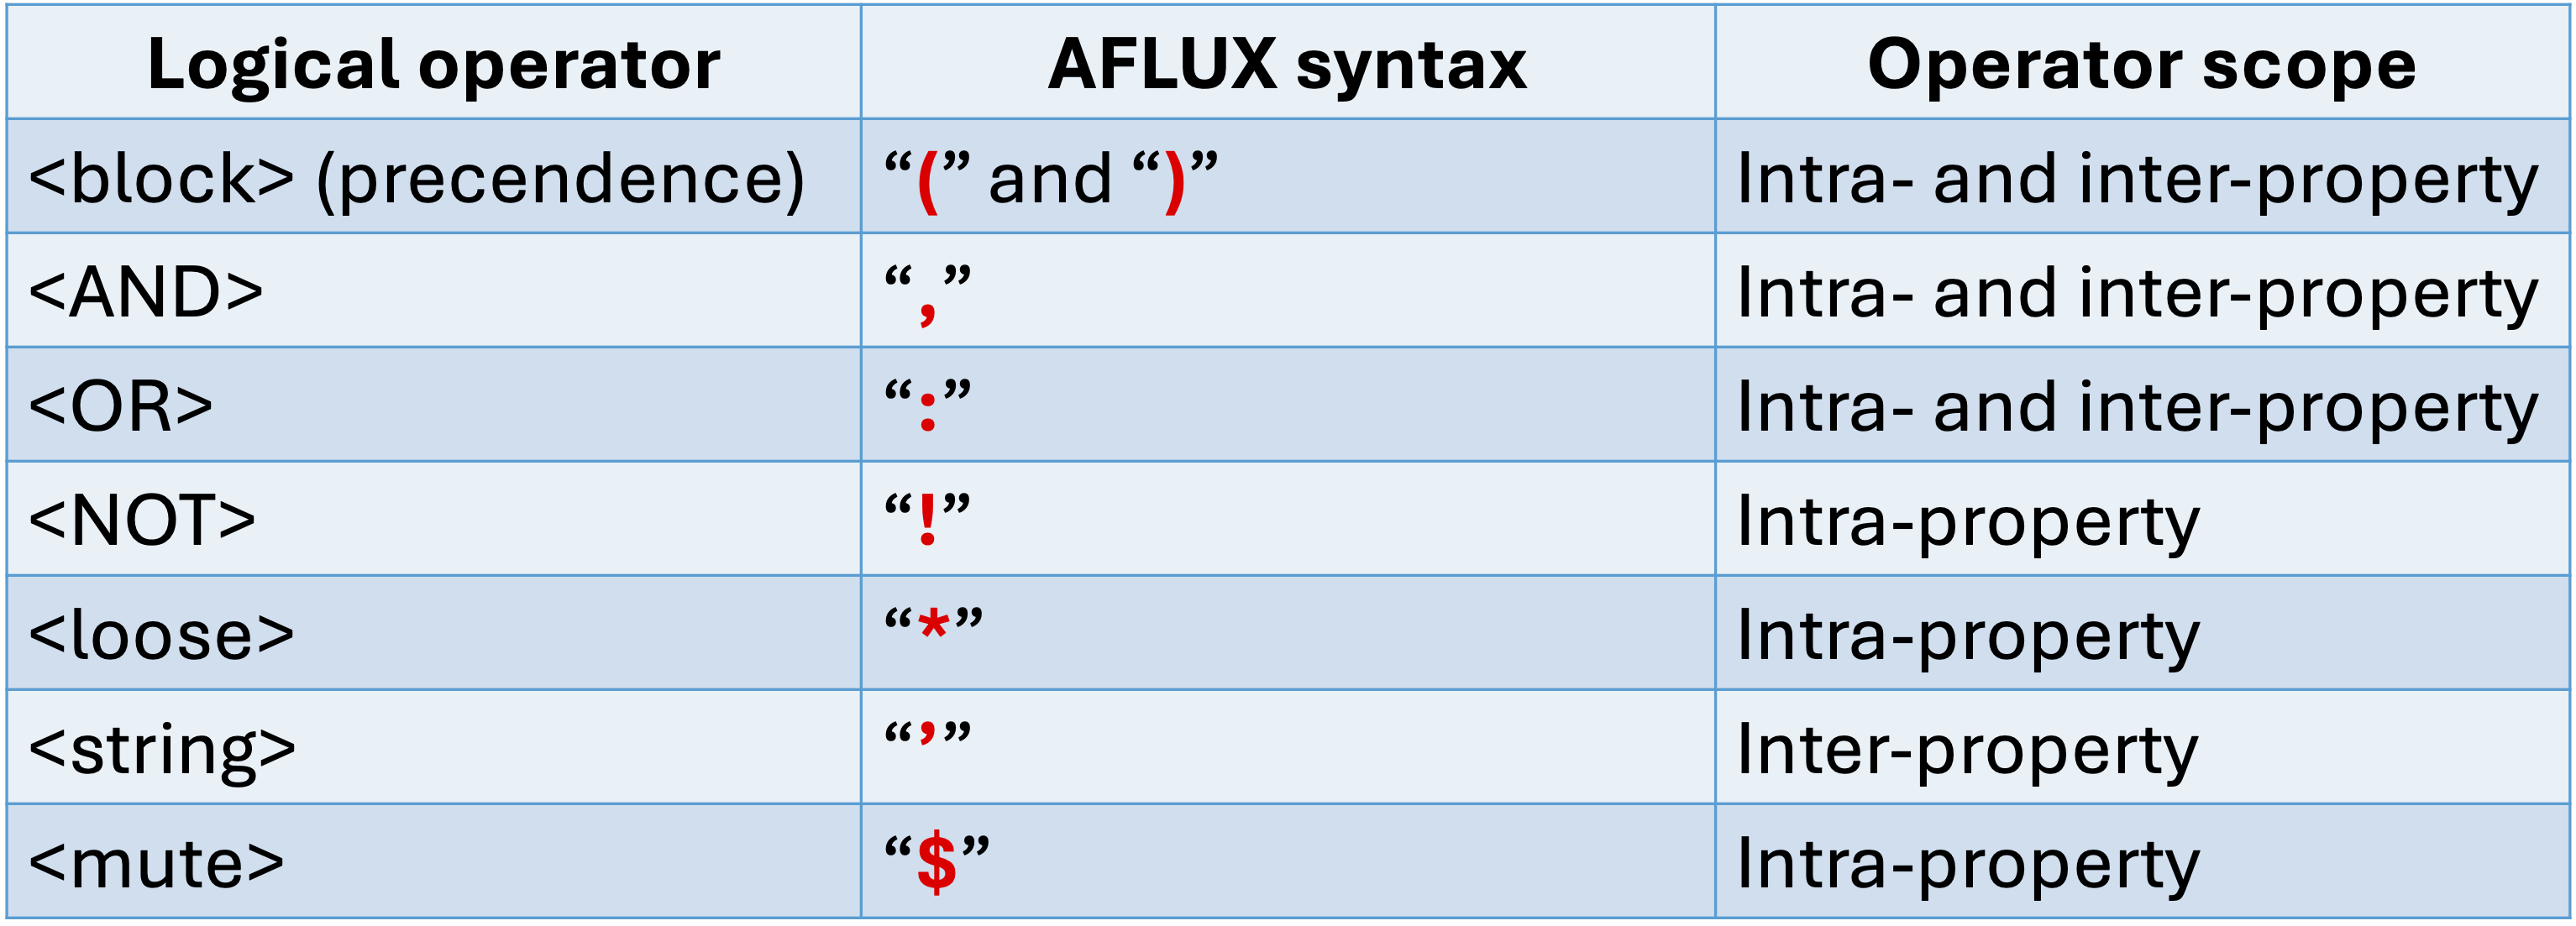


Common AFLUX keywords:

* species: chemical species (usually element symbols)
* nspecies: number of different species in compound
* Egap: electronic band gap
* spacegroup_relax: space group of relaxed structure
* Pearson_symbol_relax: Pearson symbol of relaxed structure
* aflow_prototype_label_relax: AFLOW prototype label (structure type) of relaxed structure
* auid: AFLOW unique identifier
* compound: chemical formula (elements listed alphabetically)
* aurl: AFLOW URL (link to full record for entry)

For more information, see:

* [AFLOW REST-API](https://www.sciencedirect.com/science/article/pii/S0927025614003322)
* [AFLUX search-API](https://www.sciencedirect.com/science/article/abs/pii/S092702561730229X)
* [AFLUX schema, including full list of keywords](https://aflow.org/API/aflux/?schema)

Programmatically searching for data using AFLUX API: search for NaCl or KCl with an electronic band gap greater than 5eV

* Matchbook: species((Na:K),Cl),nspecies(2),Egap(5*)

* Directives (return all entries and mute paging information): $paging(0)

Import libraries to interpret JSON objects and query URLs

In [ ]:
import json
from urllib.request import urlopen

AFLOW server and AFLUX API

Note: if you have issues accessing this directly, you can try replacing "aflow.org" with "aflowlib.duke.edu"

In [ ]:
AFLOW_SERVER="https://aflow.org"
AFLUX_API="/API/aflux/?"

Generate query: search for NaCl and KCl (Na or K and Cl)

Print query (can be opened in browser window)

Print response

In [ ]:
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

# Print URL query
print(AFLOW_SERVER+AFLUX_API+SUMMONS)

# Submit query and convert response into list of python dictionaries
response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

Note that the results are in ascending order of property value, starting with the first property keyword in matchbook

Parse JSON response: print chemical formula and electronic band gap

In [ ]:
for datum in response:
    print ("{}, {}".format(datum['compound'], datum['Egap']))

Search for materials containing C, Si, Ge or Sn but not Pb: species((C:Si:Ge:Sn),!Pb)

In [ ]:
# (C or Si or Ge or Sn) and Pb
MATCHBOOK="species((C:Si:Ge:Sn),!Pb)"
DIRECTIVES="$paging(1,10)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

print(AFLOW_SERVER+AFLUX_API+SUMMONS)

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

## Pagination in AFLUX

Paging directive: control page number and number of entries per page: useful to limit amount of data returned at once to avoid overloading browser/computer

* “Page” is set of data returned per request; “paging(0)” returns all data

* Paging takes two arguments: first is page number “n”, second is number of entries per page “m”: paging(n,m)

* Example: return first page with 10 entries per page: paging(1,10)

* Negative page number reverses sort order: paging(-1,10)



Paging: print first page of 10 entries per page

In [ ]:
MATCHBOOK="species((Na:K),Cl),nspecies(2),Egap(5*)"
# paging directive: first page of 10 entries
DIRECTIVES="$paging(2,20)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
for datum in response:
    print ("{}, {}".format(datum['compound'], datum['Egap']))

## AFLUX: search by structure type

Prototype label: \<anonymous composition>\_\<Pearson symbol>\_\<space group number>\_\<Wyckoff positions>

* Cubic perovskite: ABC3_cP5_221_a_b_c
* Rocksalt: AB_cF8_225_a_b
* Zincblende: AB_cF8_216_a_b

For more information see AFLOW-Xtalfinder: https://www.nature.com/articles/s41524-020-00483-4

Search for NaCl in rocksalt structure: prototype label is AB_cF8_225_a_b

In [ ]:
MATCHBOOK="species(Na,Cl),nspecies(2),aflow_prototype_label_relax(AB_cF8_225_a_b)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

Search for lead-free halide perovskites with band-gap greater than 3eV

Perovskite label: ABC3_cP5_221_a_b_c

In [ ]:
MATCHBOOK="species((F:Cl:Br:I),!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

Search for lead-free halide perovskites with band-gap greater than 3eV: use "Halogens" variable to search for all Halogens

In [ ]:
MATCHBOOK="species(Halogens,!Pb),nspecies(3),aflow_prototype_label_relax(ABC3_cP5_221_a_b_c),Egap(3*)"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(response)

Use prototype label to remove duplicate entries to clean data

First download data for different compositions in the Si-C system

In [ ]:
MATCHBOOK="species(Si,C),nspecies(2),Egap(*),aflow_prototype_label_relax"
DIRECTIVES="$paging(0)"
SUMMONS=MATCHBOOK+","+DIRECTIVES

response=json.loads(urlopen(AFLOW_SERVER+AFLUX_API+SUMMONS).read().decode("utf-8"))
print(len(response))
# Print chemical formula, band gap and prototype label
for datum in response:
    print ("{}, {}, {}".format(datum['compound'], datum['Egap'], datum['aflow_prototype_label_relax']))

Clean data: only keep entries with unique prototype labels

In [ ]:
# List for non-duplicate entries
SiC_clean = []
# List with unique prototype labels
SiC_prototypes = []
# Loop over all returned entries
for entry in response:
  # Check if entry not already recorded (i.e. if it is not a duplicate)
  if entry["aflow_prototype_label_relax"] not in SiC_prototypes:
    # Append unique entry to clean list
    SiC_clean.append(entry)
    # Append prototype label to list: other entries with same label will not be added to clean list
    SiC_prototypes.append(entry["aflow_prototype_label_relax"])

# Print clean data set
print(len(SiC_clean))
for datum in SiC_clean:
    print ("{}, {}, {}".format(datum['compound'], datum['Egap'], datum['aflow_prototype_label_relax']))

## AFLUX practice exercises

1. Use the AFLOW API to find the VRH bulk moduli (“ael_bulk_modulus_vrh”) for materials containing Ti in the AFLOW database. What is the material with the highest bulk modulus? What is the space group of this material? Is it a metal or an insulator (“Egap_type”)?

2. Use the AFLUX API to find the electronic band gaps (“Egap”) for all rocksalt structure (“AB_cF8_225_a_b”) alkali halide (“AlkaliMetals”, “Halides”) materials in the AFLOW database. How many entries are returned?

# Materials Project API

Materials Project uses the MPRester API
     
* Materials Project uses a “document-based” database (MongoDB); data is returned as document objects

* Materials Project API also requires an API key (related to your login/registration on MP website)

Materials Project keywords include:

* elements: chemical elements present
* nelements: number of chemical elements present
* band_gap: electronic band gap
* nsites: number of atomic sites
* symmetry: crystallographic symmetry information
* material_id: Materials Project material ID
* formation_energy_per_atom: formation energy per atom

For more information see:

* Materials Project API documentation: https://next-gen.materialsproject.org/api

Install the Materials Project API


In [ ]:
!pip install mp-API

Import Materials Project API client

In [ ]:
from mp_api.client import MPRester

Instantiate Materials Project API objest with your API key

Your REST-API key can be found by logging into https://next-gen.materialsproject.org and going to: https://next-gen.materialsproject.org/api#api-key

In [ ]:
mpr = MPRester("<Your-API-Key-Here>")

Query Materials Project for entries with elements Si and O with band gap between 0.5 and 1.0 eV

Keyword for electronic band gap is: band_gap

In [ ]:
MP_data = mpr.materials.summary.search(elements=["Si","O"],band_gap=(0.5,1.0))
print(len(MP_data))

This will return all data for each entry satisfying the filter.

To return only specified attributes, use "fields".

Important Materials Project keywords include:

elements: chemical elements in composition

band_gap: electronic band gap

material_id: Materials Project ID for material

volume: cell volume

formula_pretty: chemical formula in standard format

symmetry: crystallographic symmetry information

formation_energy_per_atom: formation energy per atom

Return only fields for material ID, band gap, formation energy, chemical formula and symmetry

In [ ]:
MP_data = mpr.materials.summary.search(elements=["Si","O"],band_gap=(0.5,1.0),fields=["material_id", "band_gap","formation_energy_per_atom","formula_pretty","symmetry"])
print(len(MP_data))

Print out first entry

In [ ]:
print(MP_data[0])

Print Material ID and band gap for all returned entries

In [ ]:
for entry in MP_data:
    print ("{}, {}".format(entry.material_id, entry.band_gap))

# Optimade Common API

Optimade Common API is an API developed by the Optimade consortium to enable access to multiple databases: https://www.optimade.org/

* Current full Optimade specification:
   https://github.com/Materials-Consortia/OPTIMADE/blob/master/optimade.rst

* Optimade python tools: https://www.optimade.org/optimade-python-tools/latest/

Optimade query URI has the following structure: \<scheme>://\<authority>/\<path>/\<endpoint>?filter=\<query>   

Optimade supports several logical operators:

* Basic Boolean operations: “AND”, “OR”, “NOT”

* Numeric and string comparisons: “<” , “>”, “=”, “<=”, “>=”, “!=”

* Substring comparisons: “CONTAINS”, “STARTS WITH”, “ENDS WITH”

* List comparisons: “HAS”, “HAS ALL”, “HAS ANY” “HAS ONLY”, “LENGTH”

Optimade keywords:

* “elements”: list of elements to query

* “nelements”: number of elements

Optimade endpoints: structures, calculations

For more information, see publications:

* [Original Optimade API](https://www.nature.com/articles/s41597-021-00974-z)

* [Recent developments in Optimade](https://pubs.rsc.org/en/content/articlehtml/2024/dd/d4dd00039k)

Optimade endpoints for different databases

* AFLOW: https://aflow.org/API/optimade/v1

* Alexandria: https://alexandria.icams.rub.de/pbe/v1/

* BioExcel-CV19: https://bioexcel-cv19.bsc.es/optimade/

* Computational Materials Repository: https://cmrdb.fysik.dtu.dk

* COD: Crystallography Open Database: https://crystallography.net/cod/optimade

* Jarvis: https://jarvis.nist.gov

* NOMAD: https://nomad-lab.eu/prod/rae/optimade/

* Materials Cloud: https://materialscloud.org/optimade/

* Materials Platform for Data Science: https://api.mpds.io

* Materials Project: https://optimade.materialsproject.org

* Open Materials Database: https://optimade.openmaterialsdb.se/

* OQMD: https://oqmd.org/optimade/

## AFLOW with Optimade


Search AFLOW for materials with the element Ti:

* Server scheme/authority/path: https://aflow.org/API/optimade/v1/

AFLOW Optimade structures endpoint: https://aflow.org/API/optimade/v1/structures?

In [ ]:
AFLOW_OPTIMADE_API='/API/optimade/v1/structures?'

* Query: elements HAS “Ti”

* Full URI:
https://aflow.org/API/optimade/v1/structures?filter=elements HAS “Ti”    

* Certain characters such as spaces and quotation remarks are reserved in HTTP and need to be escaped:

>* Space becomes %20

>* Quotation marks become %22

>* Query becomes: filter=elements%20HAS%20%22Ti%22

>* Full URI becomes: https://aflow.org/API/optimade/v1/structures?filter=elements%20HAS%20%22Ti%22    

In [ ]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

Materials data in response is under keyword data: response['data']

Print out number of materials in response:

In [ ]:
print(len(response))

Search for materials containing C, Si, Ge or Sn but not Pb: filter=elements HAS ANY "C","Si","Ge","Sn" AND NOT elements HAS "Pb"

Escaping quotation marks and spaces gives: filter=elements%20HAS%20%ANY%2022C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22


In [ ]:
FILTER='filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

## Materials Project with Optimade

Materials Project Optimade structures endpoint: https://optimade.materialsproject.org/v1/structures

In [ ]:
MP_OPTIMADE_API='https://optimade.materialsproject.org/v1/structures?'

Search Materials Project for materials containing Ti

In [ ]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(MP_OPTIMADE_API+FILTER)

## OQMD with Optimade

OQMD Optimade structures endpoint: https://oqmd.org/optimade/structures

In [ ]:
OQMD_OPTIMADE_API='https://oqmd.org/optimade/structures?'

Search OQMD for materials containing Ti

In [ ]:
FILTER='filter=elements%20HAS%20%22Ti%22'

print(OQMD_OPTIMADE_API+FILTER)

response=json.loads(urlopen(OQMD_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

## NOMAD with Optimade

NOMAD Optimade structures endpoint: 'https://nomad-lab.eu/prod/rae/optimade/structures?'

In [ ]:
NOMAD_Optimade_API='https://nomad-lab.eu/prod/rae/optimade/structures?'

Search Nomad for materials containing only Ti and O

In [ ]:
FILTER='filter=elements%20HAS%20ONLY%20%22O%22,%22Ti%22'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)

Parse structure data: print out elements, lattice vectors and coordinates

In [ ]:
for entry in response['data']:
    print(entry['attributes']['elements'])
    print(entry['attributes']['lattice_vectors'])
    print(entry['attributes']['cartesian_site_positions'])

Search NOMAD for materials with C or Si or Ge or Sn but not Pb

In [ ]:
FILTER='filter=elements%20HAS%20ANY%20%22C%22,%22Si%22,%22Ge%22,%22Sn%22%20AND%20NOT%20elements%20HAS%20%22Pb%22'

print(NOMAD_Optimade_API+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+FILTER).read().decode("utf-8"))
print(response)
print(len(response['data']))

## Optimade: Database specific keywords

Database-specific keywords can also be used to search for properties in that database

In Optimade, a database-specific prefix is appended to the database-specific keyword

This is something that is still under development for the databases supporting the Optimade API

Example: bulk modulus in AFLOW:

Keyword for band gap AFLOW is “ael_bulk_modulus_vrh”

The prefix for AFLOW is “_aflow_”

In AFLOW-OPTIMADE, this becomes: “_aflow_ael_bulk_modulus_vrh”

Exampl: eUse Optimade to search for materials in AFLOW containing Ti, with a total of 2 elements, and that have a bulk modulus greater than 100 GPa

In [ ]:
FILTER='filter=elements%20HAS%20%22Ti%22%20AND%20nelements=2%20AND%20_aflow_ael_bulk_modulus_vrh>100'

print(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER)

response=json.loads(urlopen(AFLOW_SERVER+AFLOW_OPTIMADE_API+FILTER).read().decode("utf-8"))
print(response)

## Optimade pagination

Optimade pagination uses the following keywords:

* page_limit: number of entries per page
* page_number: number of page
* page_offset: number of entries to skip

Optimade pagination commands come after query "?" but before filter:

structures?page_offset=100&page_limit=50&filter=elements HAS Ti

Search NOMAD for materials with Ga. Return second page of 50 entries.


In [ ]:
PAGE='page_number=2&page_limit=50&'
FILTER='filter=elements%20HAS%20%22Ga%22'

print(NOMAD_Optimade_API+PAGE+FILTER)

response=json.loads(urlopen(NOMAD_Optimade_API+PAGE+FILTER).read().decode("utf-8"))
print(response)
print(len(response['data']))

## Optimade Exercises

1. Use the Optimade API to find binary materials containing Ag in the AFLOW database. How many entries are returned?

2. Use the Optimade API to find materials containing Li but not Na in the NOMAD database. How many entries are returned?

3. Use the Optimade API to find ternary materials containing Nb in the NOMAD database. How many entries are returned?